1. https://data.caltech.edu/records/20098
2. https://www.kaggle.com/code/anuragmishra2311/birds-classification-using-resnet-101/notebook
3. https://www.kaggle.com/datasets/gpiosenka/100-bird-species

In [6]:
import os
import shutil
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications import ResNet101V2

In [7]:
train_directory='../../../../../DataSets/IMG-100/train'
val_directory='../../../../../DataSets/IMG-100/valid'
test_directory='../../../../../DataSets/IMG-100/test'

In [8]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [9]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)
                                                 
                                                 
test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [10]:
train_generator.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'ALBATROSS': 7,
 'ALBERTS TOWHEE': 8,
 'ALEXANDRINE PARAKEET': 9,
 'ALPINE CHOUGH': 10,
 'ALTAMIRA YELLOWTHROAT': 11,
 'AMERICAN AVOCET': 12,
 'AMERICAN BITTERN': 13,
 'AMERICAN COOT': 14,
 'AMERICAN GOLDFINCH': 15,
 'AMERICAN KESTREL': 16,
 'AMERICAN PIPIT': 17,
 'AMERICAN REDSTART': 18,
 'AMETHYST WOODSTAR': 19,
 'ANDEAN GOOSE': 20,
 'ANDEAN LAPWING': 21,
 'ANDEAN SISKIN': 22,
 'ANHINGA': 23,
 'ANIANIAU': 24,
 'ANNAS HUMMINGBIRD': 25,
 'ANTBIRD': 26,
 'ANTILLEAN EUPHONIA': 27,
 'APAPANE': 28,
 'APOSTLEBIRD': 29,
 'ARARIPE MANAKIN': 30,
 'ASHY THRUSHBIRD': 31,
 'ASIAN CRESTED IBIS': 32,
 'AVADAVAT': 33,
 'AZURE JAY': 34,
 'AZURE TANAGER': 35,
 'AZURE TIT': 36,
 'BAIKAL TEAL': 37,
 'BALD EAGLE': 38,
 'BALD IBIS': 39,
 'BALI STARLING': 40,
 'BALTIMORE ORIOLE': 41,
 'BANANAQUIT': 42,
 'BAND TAILED 

In [11]:
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

In [12]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              205522944 
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [13]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

c:\ProgramData\Miniconda3\envs\dbsenvalt\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history=model.fit(train_generator,validation_data= val_generator, epochs=5)

Epoch 1/5


In [ ]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data= val_generator, epochs=1)

c:\ProgramData\Miniconda3\envs\dbsenvalt\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


37/37 [==============================] - 1364s 37s/step - loss: 0.1068 - accuracy: 0.9916


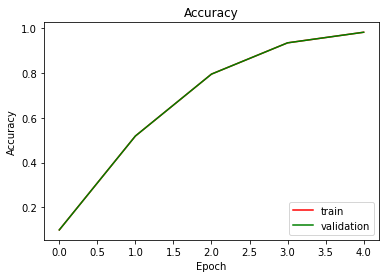

In [ ]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

KeyError: 'val_loss'

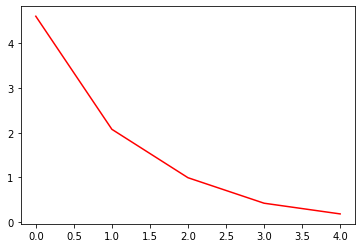

In [ ]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [22]:
model.evaluate(test_gemerator)

 8/10 [=======================>......] - ETA: 1:06 - loss: 1.8145 - accuracy: 0.5337

KeyboardInterrupt: 

In [ ]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

In [ ]:
img='../../../../../DataSets/IMG-100/images to test/1.jpg'
pic=load_img('../../../../../DataSets/IMG-100/images to test/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [ ]:
img='../../../../../DataSets/IMG-100/images to test/2.jpg'
pic=load_img('../../../../../DataSets/IMG-100/images to test/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [ ]:
img='../../../../../DataSets/IMG-100/images to test/3.jpg'
pic=load_img('../../../../../DataSets/IMG-100/images to test/3.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)